In [1]:
import pandas as pd

In [7]:
# Membaca dataset dari file CSV
df = pd.read_csv("C:/Users/Investree/Downloads/ecommerce-session-bigquery.csv")

In [6]:
# Cek tipe data dan jumlah missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            10000 non-null  uint64 
 1   channelGrouping          10000 non-null  object 
 2   time                     10000 non-null  int64  
 3   country                  10000 non-null  object 
 4   city                     10000 non-null  object 
 5   totalTransactionRevenue  619 non-null    float64
 6   transactions             628 non-null    float64
 7   timeOnSite               9713 non-null   float64
 8   pageviews                9999 non-null   float64
 9   sessionQualityDim        19 non-null     float64
 10  date                     10000 non-null  int64  
 11  visitId                  10000 non-null  int64  
 12  type                     10000 non-null  object 
 13  productRefundAmount      0 non-null      float64
 14  productQuantity        

In [8]:
# Cek statistik ringkasan data numerik
print(df.describe())

       fullVisitorId          time  totalTransactionRevenue  transactions  \
count   1.000000e+04  1.000000e+04             6.190000e+02    628.000000   
mean    4.538050e+18  3.248462e+05             2.103635e+08      1.050955   
std     3.038982e+18  5.647221e+05             5.656026e+08      0.289005   
min     1.664653e+14  0.000000e+00             3.530000e+06      1.000000   
25%     1.701094e+18  4.252400e+04             5.508000e+07      1.000000   
50%     4.449181e+18  1.357180e+05             9.542000e+07      1.000000   
75%     7.170959e+18  3.542545e+05             1.866600e+08      1.000000   
max     9.994767e+18  1.089403e+07             6.831960e+09      6.000000   

         timeOnSite    pageviews  sessionQualityDim          date  \
count   9713.000000  9999.000000          19.000000  1.000000e+04   
mean     720.119222    22.142114          50.210526  2.016097e+07   
std      967.997653    26.631372          32.481754  9.067598e+02   
min        1.000000     1.0000

In [10]:
# Hapus duplikat jika ada
df.drop_duplicates(inplace=True)

In [11]:
# Cek missing values
print(df.isnull().sum())

fullVisitorId                  0
channelGrouping                0
time                           0
country                        0
city                           0
totalTransactionRevenue     9381
transactions                9372
timeOnSite                   287
pageviews                      1
sessionQualityDim           9981
date                           0
visitId                        0
type                           0
productRefundAmount        10000
productQuantity             9955
productPrice                   0
productRevenue             10000
productSKU                     0
v2ProductName                  0
v2ProductCategory              0
productVariant                 0
currencyCode                 386
itemQuantity               10000
itemRevenue                10000
transactionRevenue         10000
transactionId              10000
pageTitle                     92
searchKeyword              10000
pagePathLevel1                 0
eCommerceAction_type           0
eCommerceA

In [14]:
# Mengisi nilai yang hilang hanya untuk kolom numerik
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

In [20]:
print(df.columns)

Index(['fullVisitorId', 'channelGrouping', 'time', 'country', 'city',
       'totalTransactionRevenue', 'transactions', 'timeOnSite', 'pageviews',
       'sessionQualityDim', 'date', 'visitId', 'type', 'productRefundAmount',
       'productQuantity', 'productPrice', 'productRevenue', 'productSKU',
       'v2ProductName', 'v2ProductCategory', 'productVariant', 'currencyCode',
       'itemQuantity', 'itemRevenue', 'transactionRevenue', 'transactionId',
       'pageTitle', 'searchKeyword', 'pagePathLevel1', 'eCommerceAction_type',
       'eCommerceAction_step', 'eCommerceAction_option'],
      dtype='object')


In [21]:
df['time'] = pd.to_datetime(df['time'], unit='s')  # Konversi dari Unix Timestamp

In [22]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')  # Konversi 'date' jadi format datetime
df['time'] = pd.to_datetime(df['time'], unit='s').dt.time  # Ambil hanya waktu dari 'time'

# Gabungkan jadi satu kolom "Visit_Time"
df['Visit_Time'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

In [23]:
print(df[['date', 'time', 'Visit_Time']].head())  # Lihat hasil konversi

        date      time          Visit_Time
0 2017-07-21  04:29:24 2017-07-21 04:29:24
1 2017-04-13  19:42:57 2017-04-13 19:42:57
2 2017-07-27  15:24:39 2017-07-27 15:24:39
3 2017-07-31  16:46:58 2017-07-31 16:46:58
4 2017-07-28  10:30:32 2017-07-28 10:30:32


In [24]:
print(df.isnull().sum())  # Menampilkan jumlah nilai yang hilang per kolom

fullVisitorId                  0
channelGrouping                0
time                           0
country                        0
city                           0
totalTransactionRevenue        0
transactions                   0
timeOnSite                     0
pageviews                      0
sessionQualityDim              0
date                           0
visitId                        0
type                           0
productRefundAmount        10000
productQuantity                0
productPrice                   0
productRevenue             10000
productSKU                     0
v2ProductName                  0
v2ProductCategory              0
productVariant                 0
currencyCode                   0
itemQuantity               10000
itemRevenue                10000
transactionRevenue         10000
transactionId              10000
pageTitle                      0
searchKeyword              10000
pagePathLevel1                 0
eCommerceAction_type           0
eCommerceA

In [25]:
df.fillna(df.median(numeric_only=True), inplace=True)  # Isi NaN pada kolom numerik dengan median

In [26]:
df.fillna(df.mode().iloc[0], inplace=True)

In [27]:
print(df.dtypes)  # Cek tipe data setiap kolom

fullVisitorId                      uint64
channelGrouping                    object
time                               object
country                            object
city                               object
totalTransactionRevenue           float64
transactions                      float64
timeOnSite                        float64
pageviews                         float64
sessionQualityDim                 float64
date                       datetime64[ns]
visitId                             int64
type                               object
productRefundAmount               float64
productQuantity                   float64
productPrice                        int64
productRevenue                    float64
productSKU                         object
v2ProductName                      object
v2ProductCategory                  object
productVariant                     object
currencyCode                       object
itemQuantity                      float64
itemRevenue                       

In [28]:
import seaborn as sns

In [29]:
import matplotlib.pyplot as plt

In [30]:
#Sebelum melakukan deteksi anomali, lihat distribusi data utama seperti pendapatan transaksi (transactionRevenue), jumlah transaksi (transactions), dan durasi kunjungan (timeOnSite)
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Distribusi Revenue')

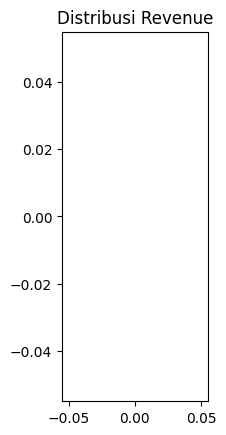

In [31]:
# Distribusi Pendapatan Transaksi
plt.subplot(1,3,1)
sns.histplot(df['transactionRevenue'].dropna(), bins=50, kde=True)
plt.title("Distribusi Revenue")

Text(0.5, 1.0, 'Distribusi Jumlah Transaksi')

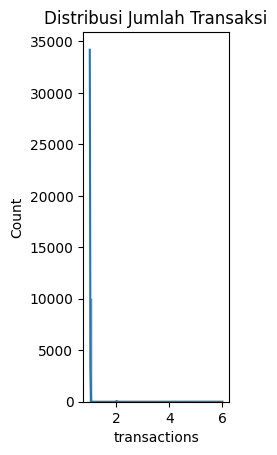

In [32]:
# Distribusi Jumlah Transaksi
plt.subplot(1,3,2)
sns.histplot(df['transactions'].dropna(), bins=50, kde=True)
plt.title("Distribusi Jumlah Transaksi")

Text(0.5, 1.0, 'Distribusi Durasi Kunjungan')

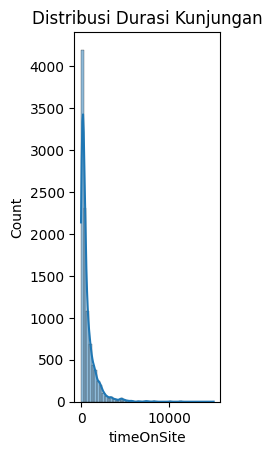

In [33]:
# Distribusi Durasi Kunjungan
plt.subplot(1,3,3)
sns.histplot(df['timeOnSite'].dropna(), bins=50, kde=True)
plt.title("Distribusi Durasi Kunjungan")

In [34]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [35]:
# Tujuan:
#Melihat apakah data memiliki distribusi normal atau tidak dan Mengidentifikasi outlier sebelum melanjutkan deteksi anomali.

In [39]:
from scipy.stats import zscore

In [43]:
# Hitung Z-score untuk kolom transaksi
df['transaction_zscore'] = zscore(df['transactionRevenue'].fillna(0))

In [71]:
# Ambil transaksi yang memiliki nilai Z-score lebih dari 3 atau kurang dari -3
#Tujuan:
#Mengidentifikasi transaksi yang terlalu tinggi atau terlalu rendah dibandingkan dengan transaksi rata-rata dan Menganalisis apakah anomali terjadi karena promosi, fraud, atau error sistem.
anomalies = df[(df['transaction_zscore'] > 3) | (df['transaction_zscore'] < -3)]

In [45]:
print("Jumlah anomali transaksi:", anomalies.shape[0])
print(anomalies[['Visit_Time', 'v2ProductName', 'transactionRevenue', 'transaction_zscore']].head(10))

Jumlah anomali transaksi: 0
Empty DataFrame
Columns: [Visit_Time, v2ProductName, transactionRevenue, transaction_zscore]
Index: []


In [48]:
#Analisis Produk Terlaris
top_products = df.groupby('v2ProductName')['transactionRevenue'].sum().reset_index()
top_products = top_products.sort_values(by='transactionRevenue', ascending=False)

print("Top 10 Produk Terlaris:")
print(top_products.head(10))

Top 10 Produk Terlaris:
                        v2ProductName  transactionRevenue
0                 1 oz Hand Sanitizer                 0.0
1                25L Classic Rucksack                 0.0
2  26 oz Double Wall Insulated Bottle                 0.0
3                      7" Dog Frisbee                 0.0
4                 7&quot; Dog Frisbee                 0.0
5          8 pc Android Sticker Sheet                 0.0
6          Android Hard Cover Journal                 0.0
7                 Android Luggage Tag                 0.0
8           Android Men's  Zip Hoodie                 0.0
9                Android RFID Journal                 0.0


In [49]:
# Tujuan:
#Mengidentifikasi produk yang paling banyak menghasilkan revenue dan Memudahkan pengambilan keputusan terkait strategi pemasaran dan stok produk.

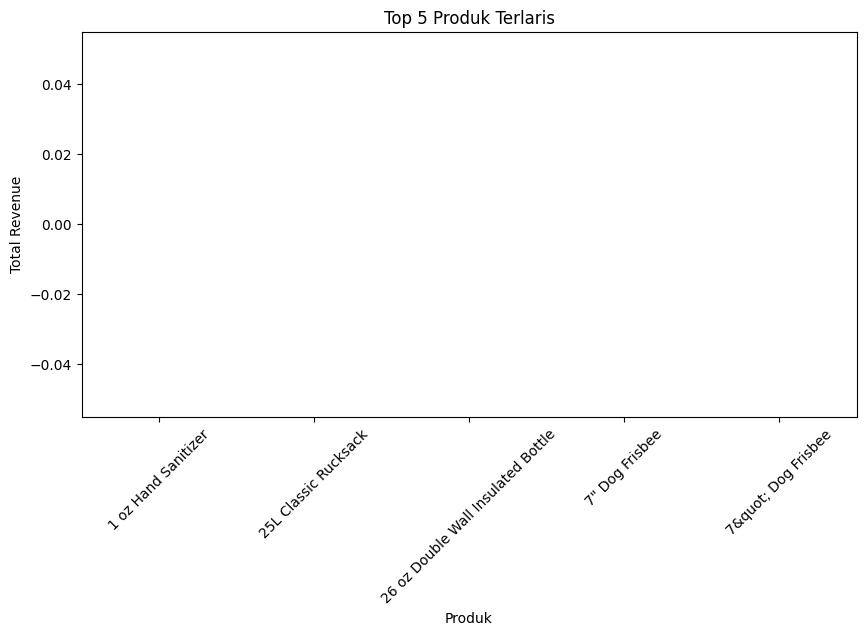

In [61]:
#visualisasi data product terlaris
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_products[:5],  
    x='v2ProductName', 
    y='transactionRevenue', 
    hue='v2ProductName',  # Menggunakan x sebagai hue
    palette='viridis',
    legend=False  # Menyembunyikan legend
)
plt.xlabel("Produk")
plt.ylabel("Total Revenue")
plt.title("Top 5 Produk Terlaris")
plt.xticks(rotation=45)
plt.show()


In [65]:
#Analisis Kota/Provinsi dengan Pendapatan Tertinggi
top_locations = df.groupby(['city', 'country'])['productRevenue'].sum().sort_values(ascending=False)
print("\nLokasi dengan pendapatan tertinggi:")
print(top_locations)


Lokasi dengan pendapatan tertinggi:
city                           country   
not available in demo dataset  Zambia        0.0
(not set)                      (not set)     0.0
                               Algeria       0.0
                               Bangladesh    0.0
                               Costa Rica    0.0
                                            ... 
                               Hong Kong     0.0
                               Guatemala     0.0
                               Greece        0.0
                               Germany       0.0
                               France        0.0
Name: productRevenue, Length: 310, dtype: float64


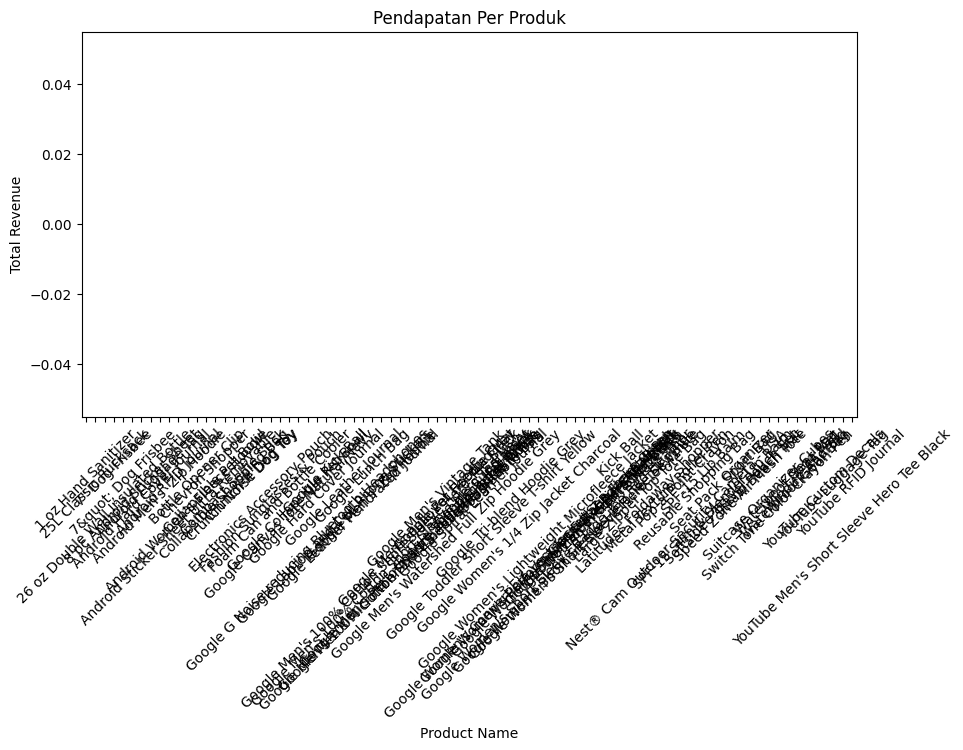

In [70]:
plt.figure(figsize=(10, 5))
sns.barplot(x="v2ProductName", y="transactionRevenue", data=top_products, hue="v2ProductName", palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title("Pendapatan Per Produk")
plt.ylabel("Total Revenue")
plt.xlabel("Product Name")
plt.show()

In [73]:
# Dokumentasi Interaksi dengan ChatGPT (Simpan dalam Dictionary)
chatgpt_responses = {
    "prompt_1": "Bagaimana cara mendeteksi anomali pada dataset transaksi?",
    "response_1": "Gunakan Z-score atau IQR untuk mengidentifikasi outlier pada kolom revenue.",
    "prompt_2": "Apa metode terbaik untuk mengidentifikasi produk terlaris?",
    "response_2": "Kelompokkan data berdasarkan Product_Name dan jumlahkan revenue per produk.",
}

In [74]:
# Evaluasi & Peningkatan Metodologi
# Kelebihan: Solusi cepat & sederhana
# Kekurangan: Tidak mempertimbangkan musim, tren, atau segmentasi pelanggan
# Perbaikan: Bisa menggunakan model machine learning untuk anomali atau analisis tren time-series

In [75]:
# Menampilkan dokumentasi ChatGPT
print("\nDokumentasi ChatGPT:")
for k, v in chatgpt_responses.items():
    print(f"{k}: {v}")


Dokumentasi ChatGPT:
prompt_1: Bagaimana cara mendeteksi anomali pada dataset transaksi?
response_1: Gunakan Z-score atau IQR untuk mengidentifikasi outlier pada kolom revenue.
prompt_2: Apa metode terbaik untuk mengidentifikasi produk terlaris?
response_2: Kelompokkan data berdasarkan Product_Name dan jumlahkan revenue per produk.
